In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

hilo us
jamestown sh
norman wells ca
ushuaia ar
bambous virieux mu
hofn is
katsuura jp
geraldton au
taolanaro mg
pedernales do
naze jp
beaune fr
talara pe
vaini to
dikson ru
albany au
tocopilla cl
cape town za
mar del plata ar
ahipara nz
ushuaia ar
lompoc us
ilulissat gl
sur om
te anau nz
hermanus za
betanzos bo
jamestown sh
jamestown sh
albany au
ushuaia ar
tuatapere nz
thompson ca
lorengau pg
albany au
grindavik is
port alfred za
leningradskiy ru
touros br
tsihombe mg
syracuse it
dawson us
anuradhapura lk
wanning cn
santa rosalia mx
hermanus za
illoqqortoormiut gl
bilibino ru
punta arenas cl
kodiak us
joao pinheiro br
ribeira grande pt
kavieng pg
busselton au
svetlyy ru
kirensk ru
bathsheba bb
fairbanks us
chokurdakh ru
georgetown sh
souillac mu
new norfolk au
port elizabeth za
hithadhoo mv
illoqqortoormiut gl
fairview ca
lebu cl
hobart au
hilo us
kaitangata nz
punta arenas cl
georgetown sh
vila franca do campo pt
khatanga ru
adrar dz
ostrovnoy ru
atuona pf
kununurra au
arraial do ca

mataura pf
hasaki jp
saskylakh ru
severo-kurilsk ru
kaitangata nz
busselton au
antofagasta cl
kavaratti in
longyearbyen sj
port alfred za
dubti et
marzuq ly
san francisco ar
superior us
severnyy ru
port alfred za
atuona pf
takoradi gh
bluff nz
ust-kamchatsk ru
alihe cn
iqaluit ca
beringovskiy ru
xining cn
mataura pf
kapaa us
rikitea pf
hobart au
bandarbeyla so
tecpan mx
ayer tawar my
puerto madero mx
georgetown sh
vaini to
nsanje mw
albany au
sioux lookout ca
hilo us
alice springs au
upernavik gl
ribeira grande pt
maunabo us
mar del plata ar
hermanus za
grand river south east mu
cayenne gf
yulara au
bluff nz
upernavik gl
khatanga ru
grand river south east mu
bredasdorp za
rikitea pf
yar-sale ru
punta arenas cl
providencia mx
half moon bay us
chuzhou cn
san rafael ar
new norfolk au
mataura pf
jamestown sh
darhan mn
breyten za
puerto ayora ec
nanortalik gl
mar del plata ar
qaanaaq gl
saint-philippe re
vaini to
nizhniy tsasuchey ru
jamestown sh
bubaque gw
yablochnyy ru
pacific grove us
so

saryshagan kz
hervey bay au
esperance au
faanui pf
palmerston au
vaini to
vila franca do campo pt
ushuaia ar
avarua ck
hermanus za
sao miguel br
tuatapere nz
butaritari ki
grand river south east mu
punta cardon ve
norsup vu
atuona pf
warora in
hilton head island us
new norfolk au
napanee ca
mwense zm
aflu dz
los llanos de aridane es
wagar sd
pevek ru
itinga br
rikitea pf
sorong id
albany au
college us
butaritari ki
ouffet be
port macquarie au
talcahuano cl
caravelas br
dikson ru
rikitea pf
avarua ck
bayangol ru
mataura pf
vaini to
avarua ck
port alfred za
hithadhoo mv
sisimiut gl
marica br
cherskiy ru
qui nhon vn
vestmannaeyjar is
vuktyl ru
qaanaaq gl
atambua id
barentsburg sj
kloulklubed pw
rikitea pf
magistralnyy ru
mataura pf
upernavik gl
albany au
elko us
danilovka ru


In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=20f3540e7b254943065c926dadcf5dd4


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | hilo
Processing Record 2 of Set 13 | jamestown
Processing Record 3 of Set 13 | norman wells
Processing Record 4 of Set 13 | ushuaia
Processing Record 5 of Set 13 | bambous virieux
Processing Record 6 of Set 13 | hofn
Processing Record 7 of Set 13 | katsuura
Processing Record 8 of Set 13 | geraldton
Processing Record 9 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 13 | pedernales
Processing Record 11 of Set 13 | naze
Processing Record 12 of Set 13 | beaune
Processing Record 13 of Set 13 | talara
Processing Record 14 of Set 13 | vaini
Processing Record 15 of Set 13 | dikson
Processing Record 16 of Set 13 | albany
Processing Record 17 of Set 13 | tocopilla
Processing Record 18 of Set 13 | cape town
Processing Record 19 of Set 13 | mar del plata
Processing Record 20 of Set 13 | ahipara
Processing Record 21 of Set 13 | lompoc
Processing Record 22 of Set 13 | ilulissat


Processing Record 34 of Set 16 | hauterive
Processing Record 35 of Set 16 | kokuy
Processing Record 36 of Set 16 | teya
Processing Record 37 of Set 16 | lolua
City not found. Skipping...
Processing Record 38 of Set 16 | ghanzi
Processing Record 39 of Set 16 | gat
Processing Record 40 of Set 16 | laguna
Processing Record 41 of Set 16 | skagastrond
City not found. Skipping...
Processing Record 42 of Set 16 | kaka
Processing Record 43 of Set 16 | palmer
Processing Record 44 of Set 16 | russell
Processing Record 45 of Set 16 | suba
Processing Record 46 of Set 16 | san cristobal
Processing Record 47 of Set 16 | avera
Processing Record 48 of Set 16 | gotsu
Processing Record 49 of Set 16 | zachagansk
City not found. Skipping...
Processing Record 50 of Set 16 | provideniya
Processing Record 1 of Set 17 | meulaboh
Processing Record 2 of Set 17 | mahebourg
Processing Record 3 of Set 17 | pachino
Processing Record 4 of Set 17 | sulingen
Processing Record 5 of Set 17 | crixas
Processing Record 6 o

Processing Record 20 of Set 20 | kavaratti
Processing Record 21 of Set 20 | dubti
Processing Record 22 of Set 20 | marzuq
Processing Record 23 of Set 20 | san francisco
Processing Record 24 of Set 20 | superior
Processing Record 25 of Set 20 | severnyy
Processing Record 26 of Set 20 | takoradi
Processing Record 27 of Set 20 | ust-kamchatsk
City not found. Skipping...
Processing Record 28 of Set 20 | alihe
Processing Record 29 of Set 20 | beringovskiy
Processing Record 30 of Set 20 | xining
Processing Record 31 of Set 20 | bandarbeyla
Processing Record 32 of Set 20 | tecpan
Processing Record 33 of Set 20 | ayer tawar
Processing Record 34 of Set 20 | puerto madero
Processing Record 35 of Set 20 | nsanje
Processing Record 36 of Set 20 | maunabo
Processing Record 37 of Set 20 | yar-sale
Processing Record 38 of Set 20 | providencia
Processing Record 39 of Set 20 | half moon bay
Processing Record 40 of Set 20 | chuzhou
Processing Record 41 of Set 20 | san rafael
Processing Record 42 of Set 2

Processing Record 7 of Set 24 | emba
Processing Record 8 of Set 24 | bereznik
Processing Record 9 of Set 24 | beaverlodge
Processing Record 10 of Set 24 | leninsk
Processing Record 11 of Set 24 | timbiqui
Processing Record 12 of Set 24 | gamba
Processing Record 13 of Set 24 | khorramabad
Processing Record 14 of Set 24 | attawapiskat
City not found. Skipping...
Processing Record 15 of Set 24 | kahului
Processing Record 16 of Set 24 | saint-ambroise
Processing Record 17 of Set 24 | karaidel
Processing Record 18 of Set 24 | champerico
Processing Record 19 of Set 24 | yerbogachen
Processing Record 20 of Set 24 | yuzhnyy
Processing Record 21 of Set 24 | angoram
Processing Record 22 of Set 24 | keokuk
Processing Record 23 of Set 24 | kieta
Processing Record 24 of Set 24 | khonuu
City not found. Skipping...
Processing Record 25 of Set 24 | eureka
Processing Record 26 of Set 24 | lira
Processing Record 27 of Set 24 | akyab
Processing Record 28 of Set 24 | dukat
Processing Record 29 of Set 24 |

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.7297,-155.0900,66.20,88,90,5.75,US,2021-03-04 07:56:14
1,Jamestown,42.0970,-79.2353,33.01,97,90,10.45,US,2021-03-04 08:00:59
2,Norman Wells,65.2820,-126.8329,-27.40,75,1,2.30,CA,2021-03-04 08:01:00
3,Ushuaia,-54.8000,-68.3000,46.40,87,20,6.91,AR,2021-03-04 08:00:05
4,Bambous Virieux,-20.3428,57.7575,86.00,62,40,11.50,MU,2021-03-04 08:01:01


In [16]:
# City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
#new_column_order = ["column2", "column4", "column1"]
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
#df = df[new_column_order]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hilo,US,2021-03-04 07:56:14,19.7297,-155.0900,66.20,88,90,5.75
1,Jamestown,US,2021-03-04 08:00:59,42.0970,-79.2353,33.01,97,90,10.45
2,Norman Wells,CA,2021-03-04 08:01:00,65.2820,-126.8329,-27.40,75,1,2.30
3,Ushuaia,AR,2021-03-04 08:00:05,-54.8000,-68.3000,46.40,87,20,6.91
4,Bambous Virieux,MU,2021-03-04 08:01:01,-20.3428,57.7575,86.00,62,40,11.50


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

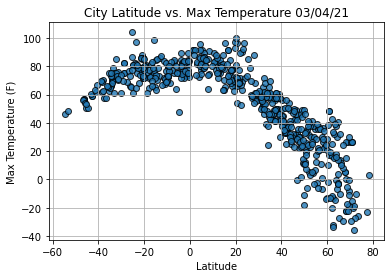

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

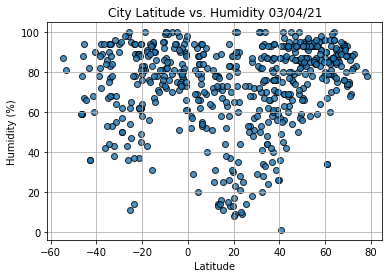

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

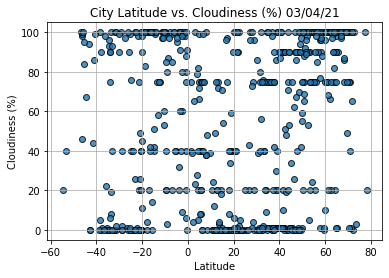

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()